In [1]:
#importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
df=pd.read_csv('Salary.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,40000
4,2.2,42000


In [24]:
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [25]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#split the data based on independent(X) and dependent feature(Y)
X=df.iloc[:,:-1].values  #iloc is used to take particular columns or records[:(for rows),:-1(take all the columns nd drop the last column)]
Y=df.iloc[:,1:].values

In [8]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
Y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 40000],
       [ 42000],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]], dtype=int64)

In [10]:
#70-30 or 80-20
#divide the complete dataset in training and testset because through the training set we are implementing the regression models through which the model will be created
#and for the test set we will be predicting what are the values for the test data
#in order to implement this we import sklearn
from sklearn.model_selection import train_test_split  #.model_selection is used to split the train_test_split
s

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
X_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [13]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [14]:
y_train

array([[112635],
       [ 55794],
       [ 83088],
       [101302],
       [ 56642],
       [ 66029],
       [ 64445],
       [ 61111],
       [113812],
       [ 91738],
       [ 46205],
       [121872],
       [ 60150],
       [ 42000],
       [ 81363],
       [ 93940],
       [ 57189],
       [ 54445],
       [105582],
       [ 40000],
       [ 39343],
       [ 98273],
       [ 67938],
       [ 56957]], dtype=int64)

In [15]:
y_test

array([[ 37731],
       [122391],
       [ 57081],
       [ 63218],
       [116969],
       [109431]], dtype=int64)

In [16]:
#implement of classifiers based on simple linear regression
from sklearn.linear_model import LinearRegression #from sklearn we are importing the linear regression model,linearRegression package will be calculate the Y=B0+B1.y,where B0 is the intercept point and B1 is slope
sai=LinearRegression() #we are not specifying any parameters as we are performing simple linear regression

In [17]:
sai.fit(X_train,y_train) #here we are created our training model,our classifier is ready

LinearRegression()

In [18]:
Y_predict=sai.predict(X_test)

In [26]:
Y_predict

array([[ 40584.34855471],
       [122796.19849903],
       [ 64874.21331099],
       [ 63005.76217589],
       [115322.39395863],
       [107848.58941824]])

In [19]:
#if we want predict the values that are not in our dataset
Y_predict_val=sai.predict([[8.7]])

In [20]:
Y_predict_val

array([[107848.58941824]])

In [21]:
#to check the accuracy r2_score is used
from sklearn.metrics import r2_score #r2=1-(sum of resudual/sum of mean) #where sum of mean>sum of residual #so we will get a small value #therefore 1- small value
score=r2_score(y_test,Y_predict)  
#we will get 0.8 to 0.9
score

0.9885754671606888

In [22]:
sai.score(X_test,y_test)

0.9885754671606888

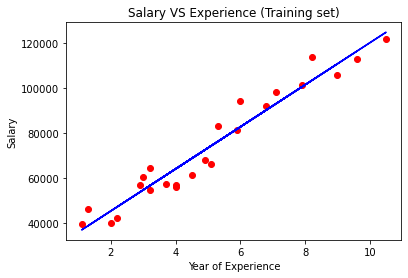

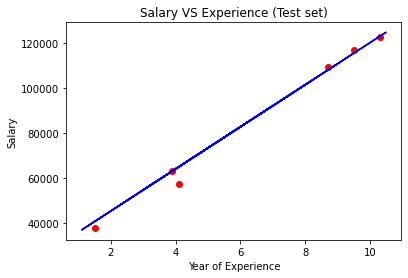

In [23]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')  #scatter is used for the example points
viz_train.plot(X_train, sai.predict(X_train), color='blue') #to fit the line
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, sai.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

#numpy
#visulization tools
1.matplotlib
2.seaborn